<a href="https://colab.research.google.com/github/jasondrebber/GEOL558/blob/main/ScikitImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit - Image Assignment
## Jason Drebber
### 2/19/2025


The following activity involves investigating various sci-kit image activities to learn how to process images a bit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from skimage import exposure
from skimage import io

from skimage import filters
from skimage.color import rgb2gray

from skimage import measure, segmentation, graph, color

from skimage.filters import unsharp_mask

import warnings
warnings.filterwarnings('ignore')

# Histogram Equalization

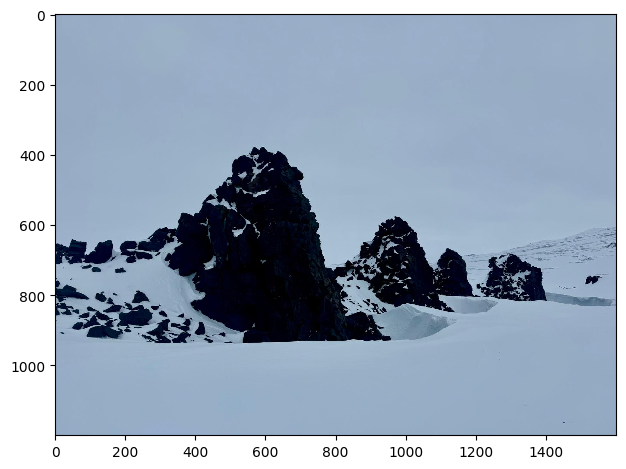

In [2]:
# Load image from github as raw file
image1 = io.imread('https://github.com/jasondrebber/GEOL558/raw/main/PHOTO-2025-01-25-15-51-44.jpg')

# View the image
io.imshow(image1)

This is an image from Antarctica, the problem is that I can't see the rocks at all or any structure on them, so I am going to try to equalize the histogram to see if I can identify any features in the image better. For context this is a volcanic outcrop through the ice sheet in West Antarctica in an area I am interested in. A friend of mine too this photo when they were in Antarctica this past winter for field work and told me I could use it for some projects.

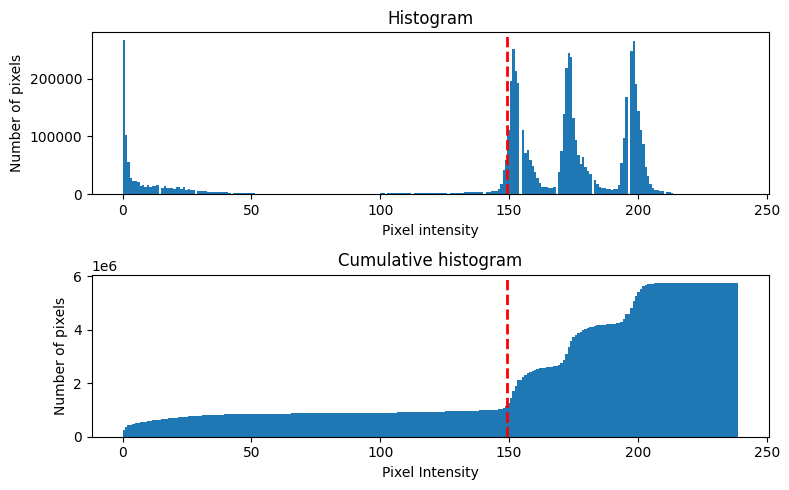

In [3]:
# Plot the histogram and cumulative histogram
fig, axes = plt.subplots(2, 1, figsize=(8, 5))
axes[0].hist(image1.ravel(), bins=256)
axes[0].set_title('Histogram')
axes[0].axvline(image1.mean(), color='r', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Pixel intensity')
axes[0].set_ylabel('Number of pixels')
axes[1].hist(image1.ravel(), bins=256, cumulative=True)
axes[1].set_title('Cumulative histogram')
axes[1].axvline(image1.mean(), color='r', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Number of pixels')
plt.tight_layout()
plt.show()

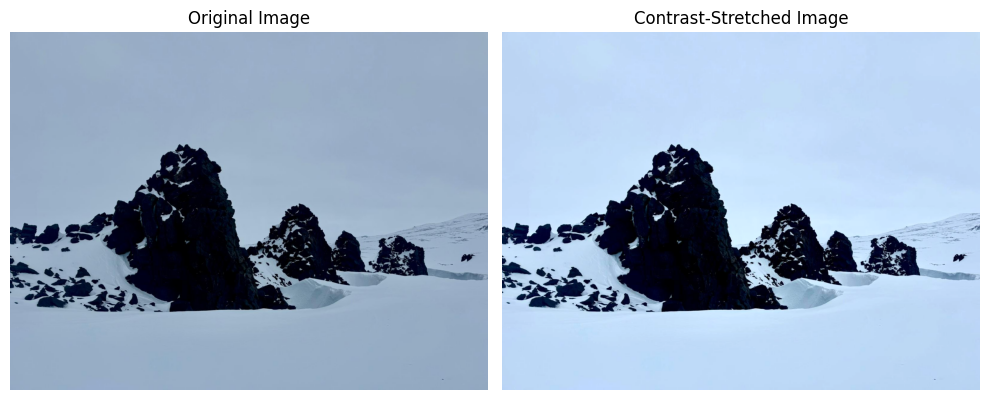

In [4]:
# Perform contrast stretching on the image
p2, p98 = np.percentile(image1, (2, 98))
image2 = exposure.rescale_intensity(image1, in_range=(p2, p98))

# Plot the original and contrast-stretched images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Contrast-Stretched Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()


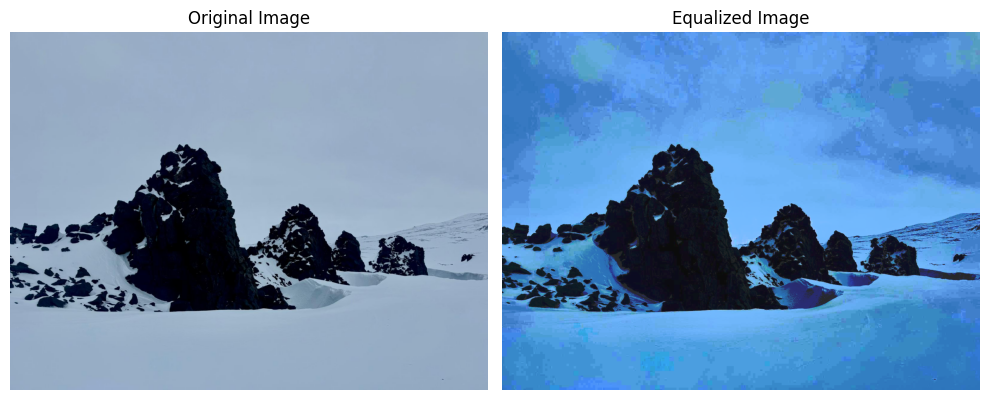

In [5]:
# Try equalization on the image
image1_eq = exposure.equalize_hist(image1)

# Plot the original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image1_eq, cmap='gray')
axes[1].set_title('Equalized Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

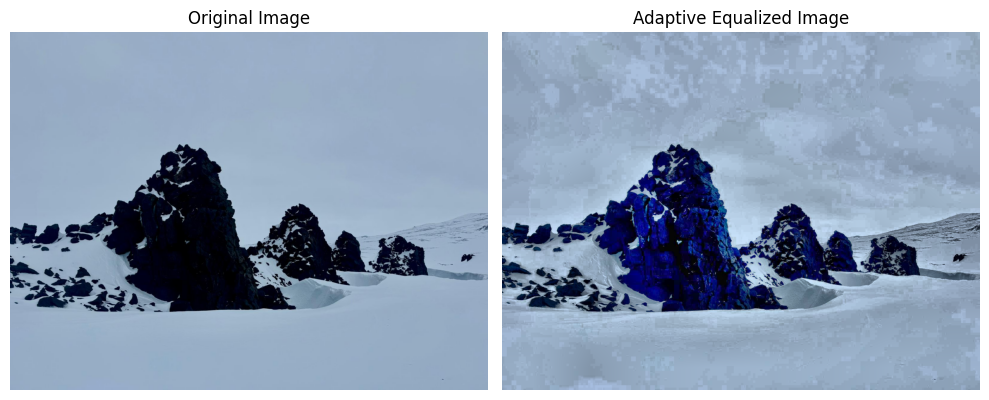

In [6]:
# Finally try adaptive equalization
image1_adeq = exposure.equalize_adapthist(image1, clip_limit=0.03)

# Plot the original and adaptive equalized image next to each other for comparison
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image1_adeq, cmap='gray')
axes[1].set_title('Adaptive Equalized Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

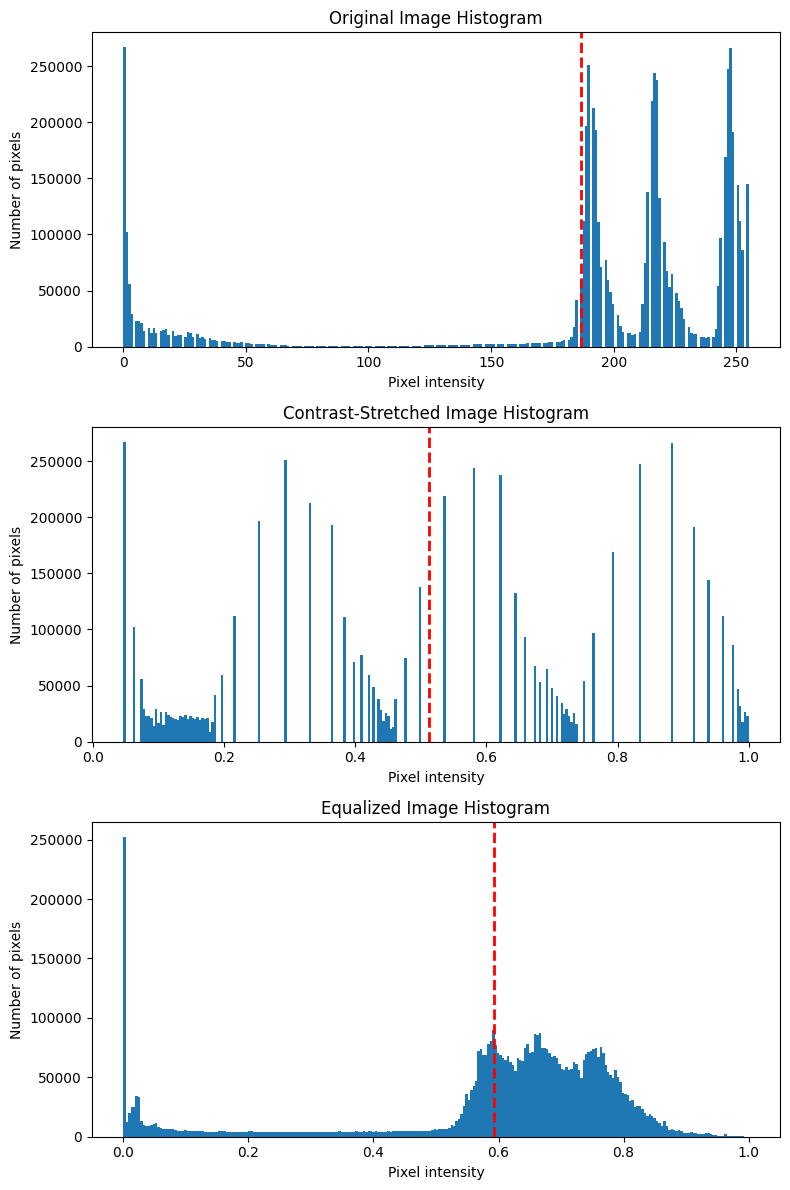

In [7]:
# Plot the histogram for each processed image
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
axes[0].hist(image2.ravel(), bins=256)
axes[0].set_title('Original Image Histogram')
axes[0].axvline(image2.mean(), color='r', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Pixel intensity')
axes[0].set_ylabel('Number of pixels')
axes[1].hist(image1_eq.ravel(), bins=256)
axes[1].set_title('Contrast-Stretched Image Histogram')
axes[1].axvline(image1_eq.mean(), color='r', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Pixel intensity')
axes[1].set_ylabel('Number of pixels')
axes[2].hist(image1_adeq.ravel(), bins=256)
axes[2].set_title('Equalized Image Histogram')
axes[2].axvline(image1_adeq.mean(), color='r', linestyle='dashed', linewidth=2)
axes[2].set_xlabel('Pixel intensity')
axes[2].set_ylabel('Number of pixels')
plt.tight_layout()
plt.show()


This is a pretty cool processing tool! It's fun to play around with the settings and see how it changes the image. I'm glad I tried all three of the different methods because tha adaptive equalized image allowed me to see a number of fractures in the rock that I could not see before by stretching the image to a more equalized scale. I also like that the constrast stretching method allowed me to brighten the image, this would be good for a lot of other applications also. I also learned that this was super super easy to implement which is awesome!

# Edge Operators

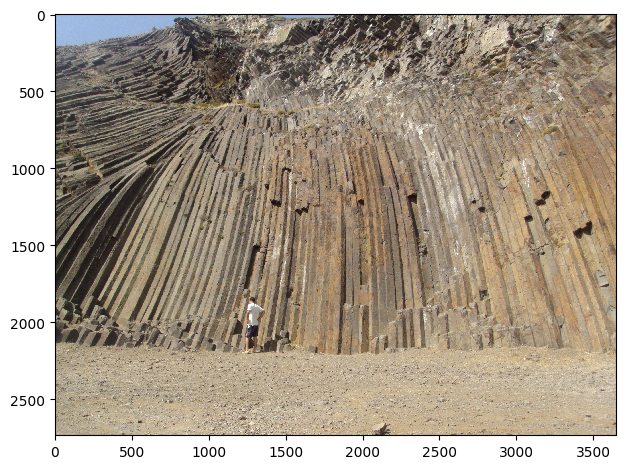

In [8]:
# Load the image of bolumnar basalt
basalt = io.imread('https://github.com/jasondrebber/GEOL558/raw/main/BasaltColumns_PortoSanto.JPG')

# View the image
io.imshow(basalt)

For the second activity I decided I wanted to try to use an edge detector operator to identify linear features in columnar basalt because I see that it could be possibly useful for fault and linear feature detection in other geologic applications. This image is from wikipedia (https://en.wikipedia.org/wiki/List_of_places_with_columnar_jointed_volcanics) and is available under a closed commons license. There are two different filters that I can try here. I will evaluate them both to see the difference.

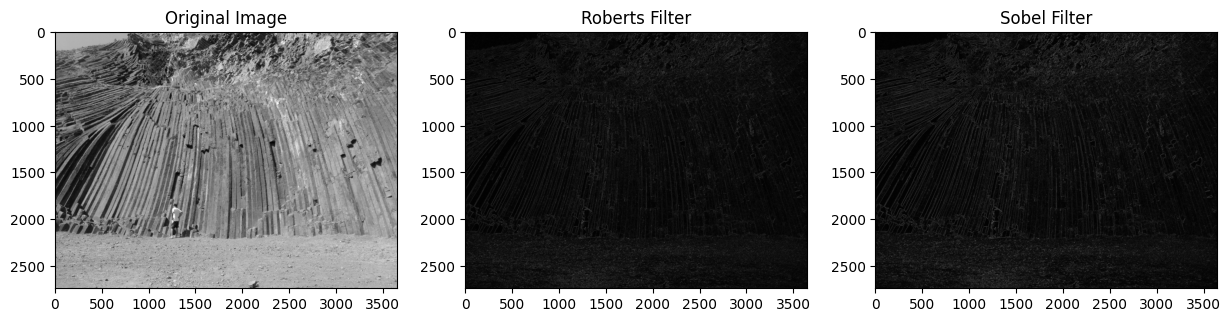

In [9]:
# The image needs to be in grayscale before applying the filter
basalt = rgb2gray(basalt)


# Apply the roberts filter to this image
edge_roberts = filters.roberts(basalt)

# Apply the sobel filter to the image
edge_sobel = filters.sobel(basalt)

# Plot the original image, the roberts filter, and the sobel filter
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(basalt, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(edge_roberts, cmap='gray')
ax[1].set_title('Roberts Filter')
ax[2].imshow(edge_sobel, cmap='gray')
ax[2].set_title('Sobel Filter')
plt.show()

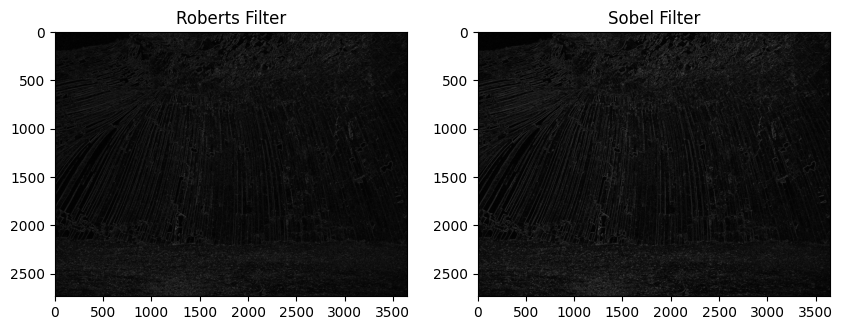

In [10]:
# Apply contrast enhancement on the edge filtered images to make them easier to see
edge_roberts_eq = exposure.rescale_intensity(edge_roberts, in_range=(p2, p98))
edge_sobel_eq = exposure.rescale_intensity(edge_sobel, in_range=(p2, p98))

# Plot the enhanced images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(edge_roberts_eq, cmap='gray')
ax[0].set_title('Roberts Filter')
ax[1].imshow(edge_sobel_eq, cmap='gray')
ax[1].set_title('Sobel Filter')
plt.show()

Well sadly this did not work exactly how I wanted it to, but I still think its not useless. Maybe with some other preprocessing that I haven't yet explored this would be a viable method for identifying the linear features in this cliff. It kind of did what I wanted it to do but it was not as effective as I was hoping.

# Unsharp masking

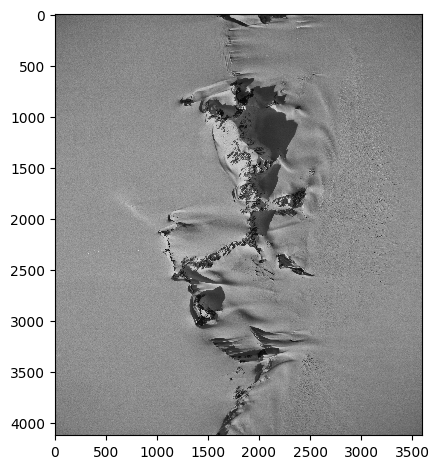

In [11]:
ant1 = io.imread('https://github.com/jasondrebber/GEOL558/raw/main/CA162132V0031%20copy.tif')

io.imshow(ant1, cmap='gray')

The following image is from Antarctica,it is of an exposed nunatak (rock) taken by a vertical film camera in the 1960's from an airplane. The image was collected from the POlar Geospatial Center website at https://www.arcgis.com/home/webmap/viewer.html?webmap=c435036b150843428d5413ffb7260ef2. The image is originally film but it was digitized. In order for me to gte the image into google colab I had to reduce the quality. This exercise is in sharpening the image in order for me to increase the sharpness of the image back to its high quality sharpness from the slightly more pixelated version using the unsharp mask tool. I will test a few different inputs to see how they change.

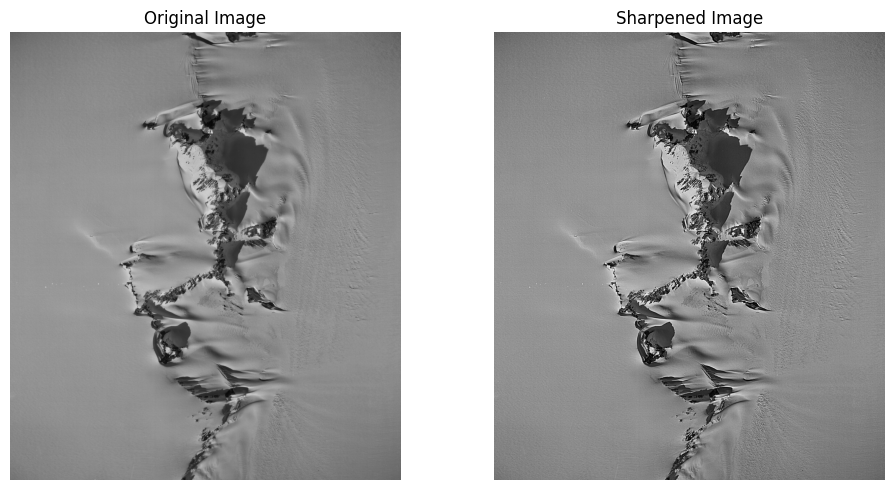

In [12]:
# Perform unsharp masking
sharpened = unsharp_mask(ant1, radius=5, amount=2)

# Plot the original and sharpened images
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(ant1, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(sharpened, cmap='gray')
axes[1].set_title('Sharpened Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

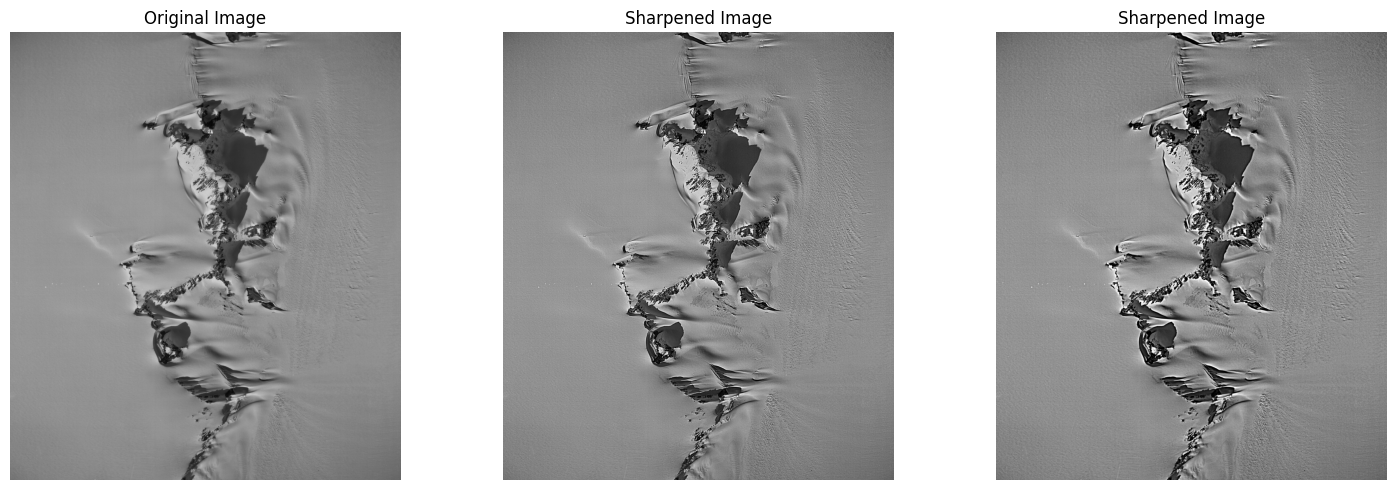

In [13]:
# Try unsharp mask again with different parameters
sharpened2 = unsharp_mask(ant1, radius=10, amount=2)

# Plot the original and two of the sharpened images to compare them all
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(ant1, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(sharpened, cmap='gray')
axes[1].set_title('Sharpened Image')
axes[1].axis('off')
axes[2].imshow(sharpened2, cmap='gray')
axes[2].set_title('Sharpened Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()


I like the first sharpening that I did that has a radius of 5, it looks clearer to me without altering the contrast too much. Overall this is a cool tool also, and I can see a lot of uses when images are too large and need to be reduced in size in order to be brought into the code.

# Contour Finding

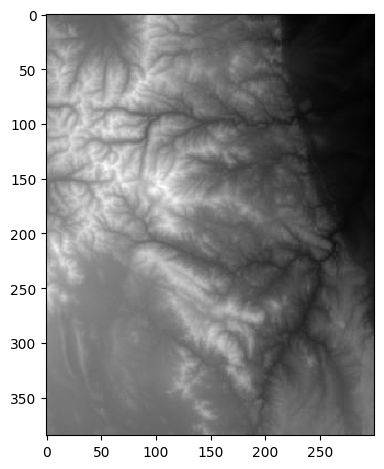

In [14]:
# Load image
sat_image = io.imread('https://github.com/jasondrebber/GEOL558/raw/main/USGS_13_n40w106_20230602.jpg')

# View the image
io.imshow(sat_image)

For this image I have collected a jpg DEM of the Golden Colorado region for the 1/3 Arc second #DEP data. My intent with this is to generate contours for this image as this would be a good method to be able to generate contours for DEM data and directly applies to a project idea I have, so I wanted to test it out here.

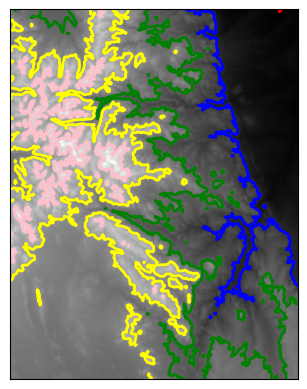

In [15]:
# find countours for the image at a value of 100
contours = measure.find_contours(sat_image, 0)
contours2 = measure.find_contours(sat_image, 50)
contours3 = measure.find_contours(sat_image,100)
contours4 = measure.find_contours(sat_image,150)
contours5 = measure.find_contours(sat_image,200)


# plot the image and the contours
fig, ax = plt.subplots()
ax.imshow(sat_image, cmap='gray')
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], c='red', linewidth=2)

for contour in contours2:
    ax.plot(contour[:, 1], contour[:, 0], c='blue', linewidth=2)

for contour in contours3:
    ax.plot(contour[:, 1], contour[:, 0], c='green', linewidth=2)

for contour in contours4:
    ax.plot(contour[:, 1], contour[:, 0], c='yellow', linewidth=2)

for contour in contours5:
    ax.plot(contour[:, 1], contour[:, 0], c='pink', linewidth=2)

ax.set_xticks([])
ax.set_yticks([])
plt.show()


This is a pretty cool tool! I like that it is easy to apply to make contours for something. And I learned something about this area, I wasn't sure what they would look like but I kind of like this. The one thing I dislike about it is that I can only make a single contour at a time not a range of contours so it is more difficult to generate contours over a range of elevations than I was hoping.

# RAG Thresholding

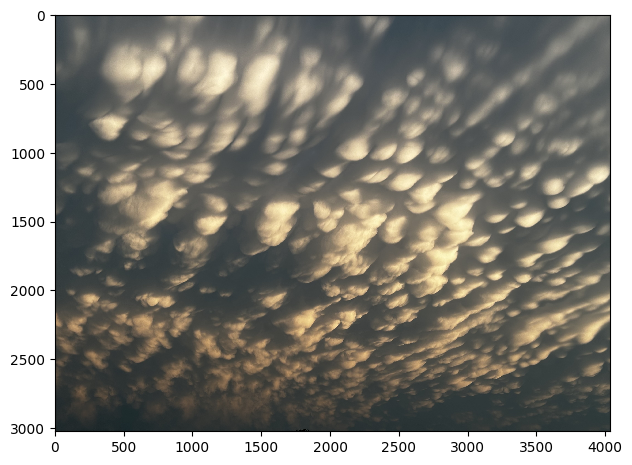

In [16]:
# Load cloud photo
clouds = io.imread('https://github.com/jasondrebber/GEOL558/raw/main/IMG_5592.jpeg')

io.imshow(clouds)

This last photo I wanted to look at is one I took in Texas last summer after a thunderstorm when the sky was covered by mammatus clouds at the perfect time of day. I want to discretize this image to practice that and I thought this would be a cool photo to do that with.

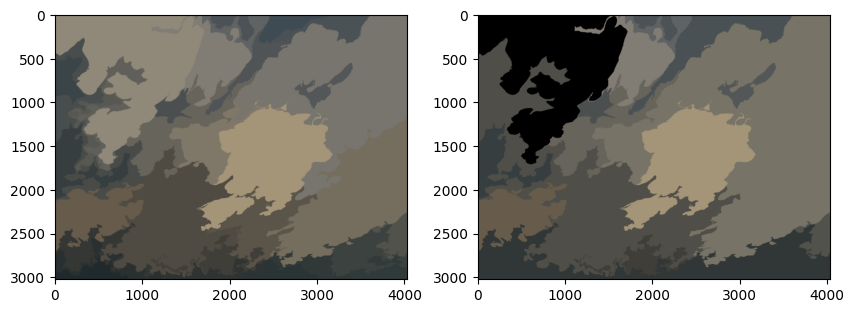

In [17]:
# discretize the image
clouds_disc = segmentation.slic(clouds, n_segments=100, compactness=0.1, sigma=1, start_label=1)
out1 = color.label2rgb(clouds_disc, clouds, kind='avg')

g = graph.rag_mean_color(clouds, clouds_disc)
labels = graph.cut_threshold(clouds_disc, g, 20)
out2 = color.label2rgb(labels, clouds, kind='avg')

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(out1)
ax[1].imshow(out2)
plt.show()

This one ended up being more difficult than I thought it would be. I expected it to be one of hte easier ones, but in fact it had a lot more intermediate functions to run than some of the other projects I did above.

# Reflection

I liked the histogram equalizer, unsharp masking and the countours most of the 5 I tried. SOme of the image tools appear to have very specific use cases which makes it difficult to apply them generally to some examples, but these ones all seemed important for geoscience and image processing. Some can increase the quality of clarity of an image or produce new data that can be usef to understand the images more such as the contours. I was pleasanytly surprised by how easy all of these were to implement. I though that image processing would be much more difficult but there were easy to use. The two I would use again are histogram equalization which can identify features in low light images (common from antarctica where I do a lot of work) and the unsharp masking which can improve image quality which is also a really cool tool. I will make sure to take a look at these agian in the future if I need to process any images as all of these were really cool, and it would be neat to explore some of them more.